In [154]:
import pandas as pd
df = pd.read_csv('CLV_Data.csv')

df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


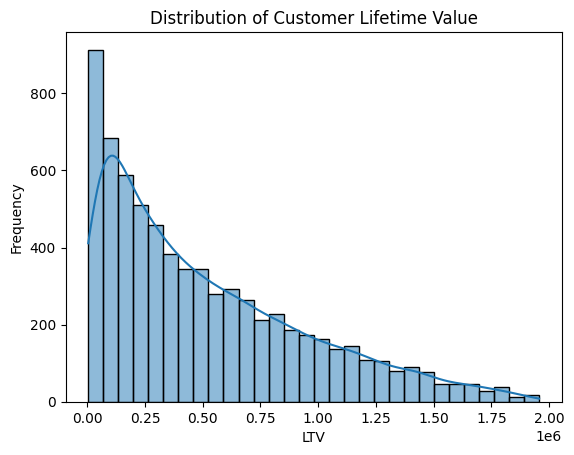

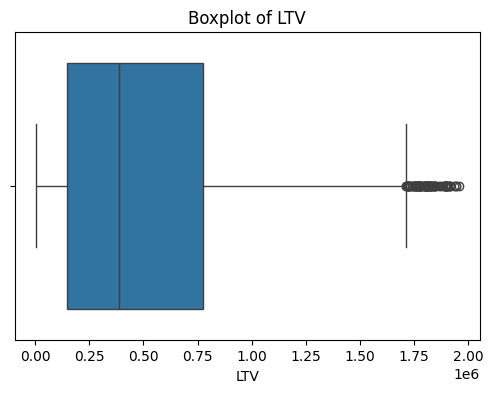

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['LTV'], bins=30, kde=True)
plt.xlabel("LTV")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Lifetime Value")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['LTV'])
plt.title("Boxplot of LTV")
plt.show()


In [156]:
Q1 = df['LTV'].quantile(0.25)
Q3 = df['LTV'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LTV'] < lower_bound) | (df['LTV'] > upper_bound)]

outliers.shape


(86, 20)

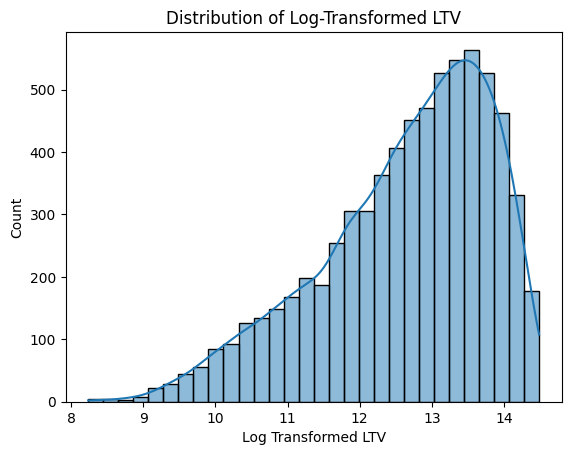

In [157]:
import numpy as np

df['LTV_log'] = np.log1p(df['LTV'])

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['LTV_log'], bins=30, kde=True)
plt.xlabel("Log Transformed LTV")
plt.title("Distribution of Log-Transformed LTV")
plt.show()


Text(0, 0.5, 'Avg_Transaction_Value')

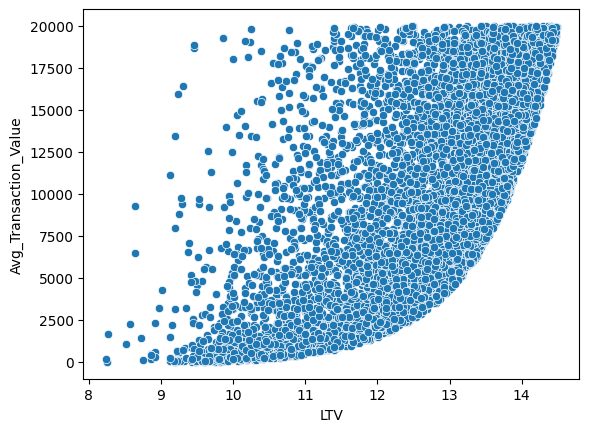

In [158]:
sns.scatterplot(x=df['LTV_log'], y=df['Avg_Transaction_Value'])
plt.xlabel("LTV")
plt.ylabel("Avg_Transaction_Value")

Text(0, 0.5, 'Active_Days')

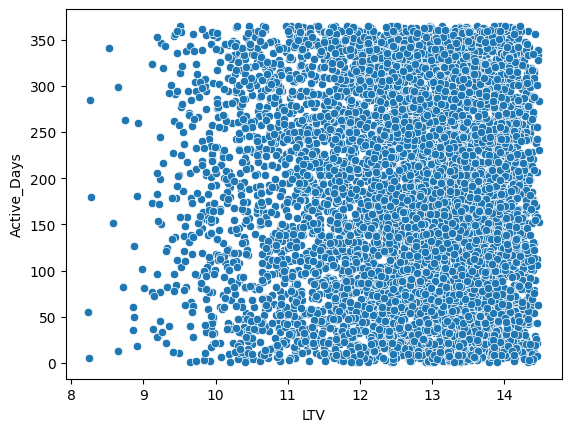

In [159]:
sns.scatterplot(x=df['LTV_log'], y=df['Active_Days'])
plt.xlabel("LTV")
plt.ylabel("Active_Days")

Text(0, 0.5, 'Total_Transactions')

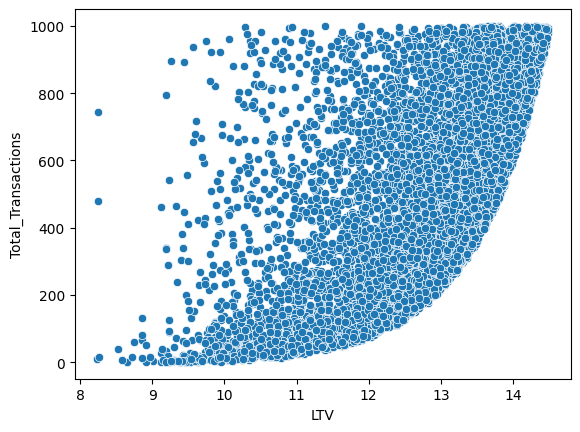

In [160]:
sns.scatterplot(x=df['LTV_log'], y=df['Total_Transactions'])
plt.xlabel("LTV")
plt.ylabel("Total_Transactions")

<Axes: >

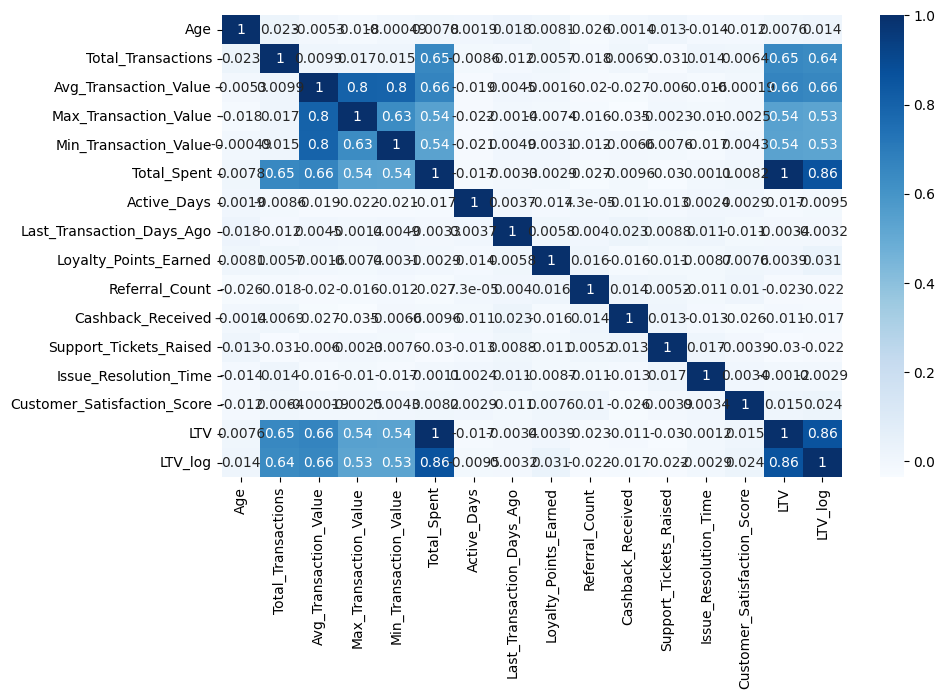

In [161]:
k = df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(k,annot=True,cmap='Blues')

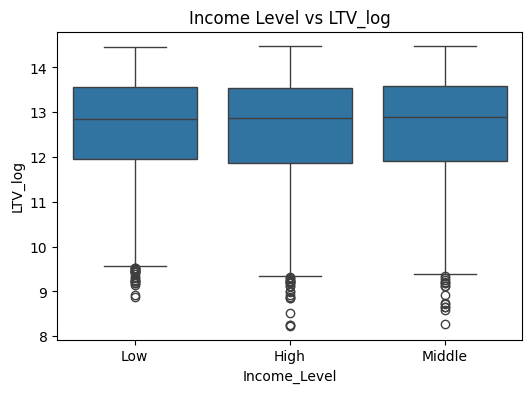

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='Income_Level', y='LTV_log', data=df)
plt.title("Income Level vs LTV_log")
plt.show()



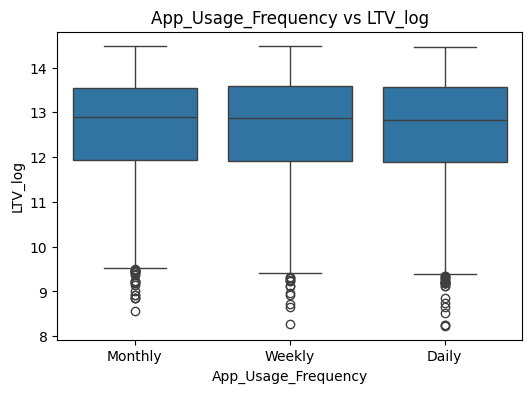

In [163]:
plt.figure(figsize=(6,4))
sns.boxplot(x='App_Usage_Frequency', y='LTV_log', data=df)
plt.title("App_Usage_Frequency vs LTV_log")
plt.show()

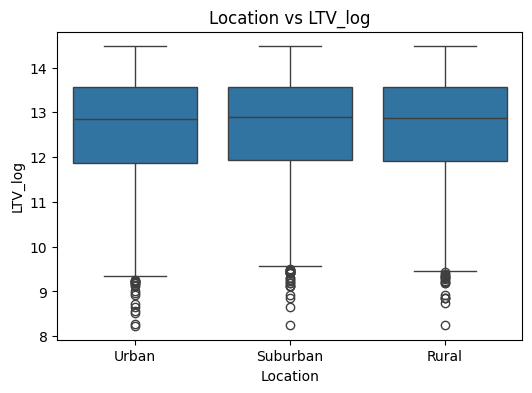

In [164]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Location', y='LTV_log', data=df)
plt.title("Location vs LTV_log")
plt.show()

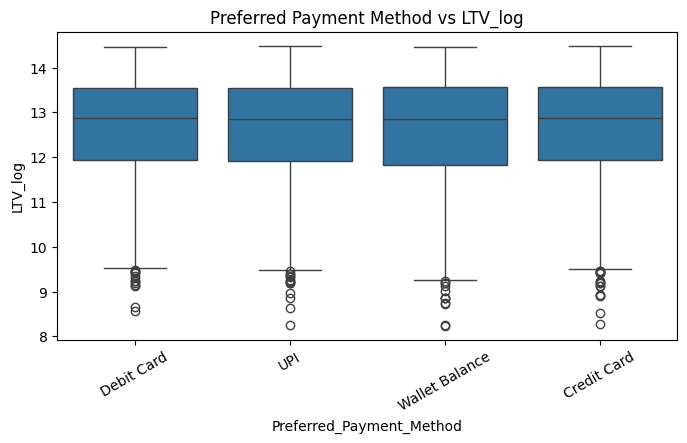

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x='Preferred_Payment_Method', y='LTV_log', data=df)
plt.title("Preferred Payment Method vs LTV_log")
plt.xticks(rotation=30)
plt.show()


In [166]:
X = df.drop(
    ['Total_Spent',
     'Customer_ID',
     'Max_Transaction_Value',
     'Min_Transaction_Value',
     'LTV',
     'LTV_log'],
    axis=1
)

Y = df['LTV_log']
Y.shape
X.shape


(7000, 15)

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [168]:
X_train.shape
X_test.shape


(1400, 15)

In [169]:
from sklearn.preprocessing import LabelEncoder

le_income = LabelEncoder()
le_app = LabelEncoder()

X_train['Income_Level'] = le_income.fit_transform(X_train['Income_Level'])
X_test['Income_Level'] = le_income.transform(X_test['Income_Level'])

X_train['App_Usage_Frequency'] = le_app.fit_transform(X_train['App_Usage_Frequency'])
X_test['App_Usage_Frequency'] = le_app.transform(X_test['App_Usage_Frequency'])


In [170]:
X_train = pd.get_dummies(X_train, columns=['Location','Preferred_Payment_Method'],drop_first = True)



In [171]:
X_test = pd.get_dummies(X_test, columns=['Location','Preferred_Payment_Method'],drop_first = True)


In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = [
    'Age',
    'Total_Transactions',
    'Avg_Transaction_Value',
    'Active_Days',
    'Last_Transaction_Days_Ago',
    'Loyalty_Points_Earned',
    'Referral_Count',
    'Cashback_Received',
    'Support_Tickets_Raised',
    'Issue_Resolution_Time',
    'Customer_Satisfaction_Score'
]

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [173]:
X_train[num_cols].mean()



,0
Age,1.484527e-16
Total_Transactions,-7.200589e-17
Avg_Transaction_Value,-2.410770e-17
Active_Days,-1.259310e-16
Last_Transaction_Days_Ago,-3.172066e-17
Loyalty_Points_Earned,1.370332e-16
Referral_Count,0.000000e+00
Cashback_Received,1.877863e-16
Support_Tickets_Raised,-7.137148e-17
Issue_Resolution_Time,2.207758e-16


In [174]:
X_train[num_cols].std()

,0
Age,1.000089
Total_Transactions,1.000089
Avg_Transaction_Value,1.000089
Active_Days,1.000089
Last_Transaction_Days_Ago,1.000089
Loyalty_Points_Earned,1.000089
Referral_Count,1.000089
Cashback_Received,1.000089
Support_Tickets_Raised,1.000089
Issue_Resolution_Time,1.000089


In [175]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [176]:
y_pred = lr.predict(X_test)


In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

mae, rmse, r2


(0.3721006697771322, np.float64(0.5111269257062689), 0.8173177908007391)

In [178]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)


Ridge()

In [179]:
y_pred_ridge = ridge.predict(X_test)


In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_ridge = mean_absolute_error(Y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(Y_test, y_pred_ridge))
r2_ridge = r2_score(Y_test, y_pred_ridge)

mae_ridge, rmse_ridge, r2_ridge


(0.37207301850859703, np.float64(0.5111285570541763), 0.8173166246766306)

In [181]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)


Lasso(alpha=0.01)

In [182]:
y_pred_lasso = lasso.predict(X_test)


In [183]:
mae_lasso = mean_absolute_error(Y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(Y_test, y_pred_lasso))
r2_lasso = r2_score(Y_test, y_pred_lasso)

mae_lasso, rmse_lasso, r2_lasso


(0.36965060673676275, np.float64(0.5110407335953147), 0.8173793975635084)

In [184]:
import pandas as pd

lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)
lasso_coef


,0
Age,0.000000
Income_Level,-0.000000
Total_Transactions,0.734050
Avg_Transaction_Value,0.755776
Active_Days,0.000000
Last_Transaction_Days_Ago,-0.000000
Loyalty_Points_Earned,0.023338
Referral_Count,0.000000
Cashback_Received,-0.000000
App_Usage_Frequency,-0.000000


In [185]:
lasso_coef[lasso_coef == 0]


,0
Age,0.0
Income_Level,-0.0
Active_Days,0.0
Last_Transaction_Days_Ago,-0.0
Referral_Count,0.0
Cashback_Received,-0.0
App_Usage_Frequency,-0.0
Support_Tickets_Raised,0.0
Issue_Resolution_Time,0.0
Location_Suburban,0.0
